In [1]:
using CairoMakie

In [80]:
set_theme!(theme_dark())

In [178]:
include("egm_code.jl")

egm_find_policies (generic function with 1 method)

In [179]:
model = create_EGM_model_aiyagari(;na = 101, nz = 19)

(n = 1919, na = 101, nz = 19, α = 0.33, β = 0.96, A = 0.08, γ = 2.0, δ = 0.1, θ = 2, lb = 0, ub = 200.0, ρ = 0.9, μ = 0.0, σ = 0.003, agrid = [0.0, 0.02, 0.08, 0.18, 0.32, 0.5000000000000001, 0.72, 0.9800000000000001, 1.28, 1.6199999999999999  …  165.62, 169.28, 172.98000000000002, 176.72, 180.5, 184.32, 188.17999999999998, 192.07999999999998, 196.01999999999998, 200.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6], w = 1.0, r_lb = 0.0, r_ub = 0.1, r_iter = 0.05, toler_pol = 1.0e-6, toler_price = 0.001, maxiter_pol = 500, maxiter_prices = 100, print_skip_pol = 5, print_skip_val = 50)

In [180]:
test = egm_find_policies(model)

/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 39.56341372926232
--------------------
Iteration: 5, Error: 0.3681147252468122
--------------------
Iteration: 10, Error: 0.24810780551858866
--------------------
Iteration: 15, Error: 0.33071068553519617
--------------------
Iteration: 20, Error: 0.3426703231571624
--------------------
Iteration: 25, Error: 0.3431273612064008
--------------------
Iteration: 30, Error: 0.3431611768713099
--------------------
Iteration: 35, Error: 0.34316350446989113
--------------------
Iteration: 40, Error: 0.34316368067574693
--------------------
Iteration: 45, Error: 0.3431636928353561
--------------------
Iteration: 50, Error: 0.3431636937560083
--------------------
Iteration: 55, Error: 0.3431636938195413
--------------------
Iteration: 60, Error: 0.34316369382435163
--------------------
Iteration: 65, Error: 0.3431636938246836
--------------------
Iteration: 70, Error: 0.3431636938247087
--------------------
Iteration: 

101×19 Matrix{Float64}:
   0.0          0.0          0.0        …   11.6252   17.9196   27.5485
   0.0          0.0          0.0            11.638    17.9324   27.5613
   0.0          0.0          0.0            11.6764   17.9708   27.5997
   0.0          0.0          0.0            11.7403   18.0348   27.6638
   0.0          0.0          0.0            11.8298   18.1244   27.7534
   0.0658694    0.0714287    0.0799258  …   11.9449   18.2396   27.8687
   0.204138     0.211957     0.223908       12.0856   18.3805   28.0096
   0.386457     0.394156     0.405924       12.2518   18.5469   28.1762
   0.590856     0.598237     0.609518       12.4437   18.7389   28.3683
   0.813957     0.821092     0.831999       12.6611   18.9566   28.5861
   ⋮                                    ⋱                      
 108.164      108.171      108.182         120.081   126.386   136.023
 110.535      110.542      110.553         122.452   128.757   138.394
 112.932      112.939      112.95          124.849

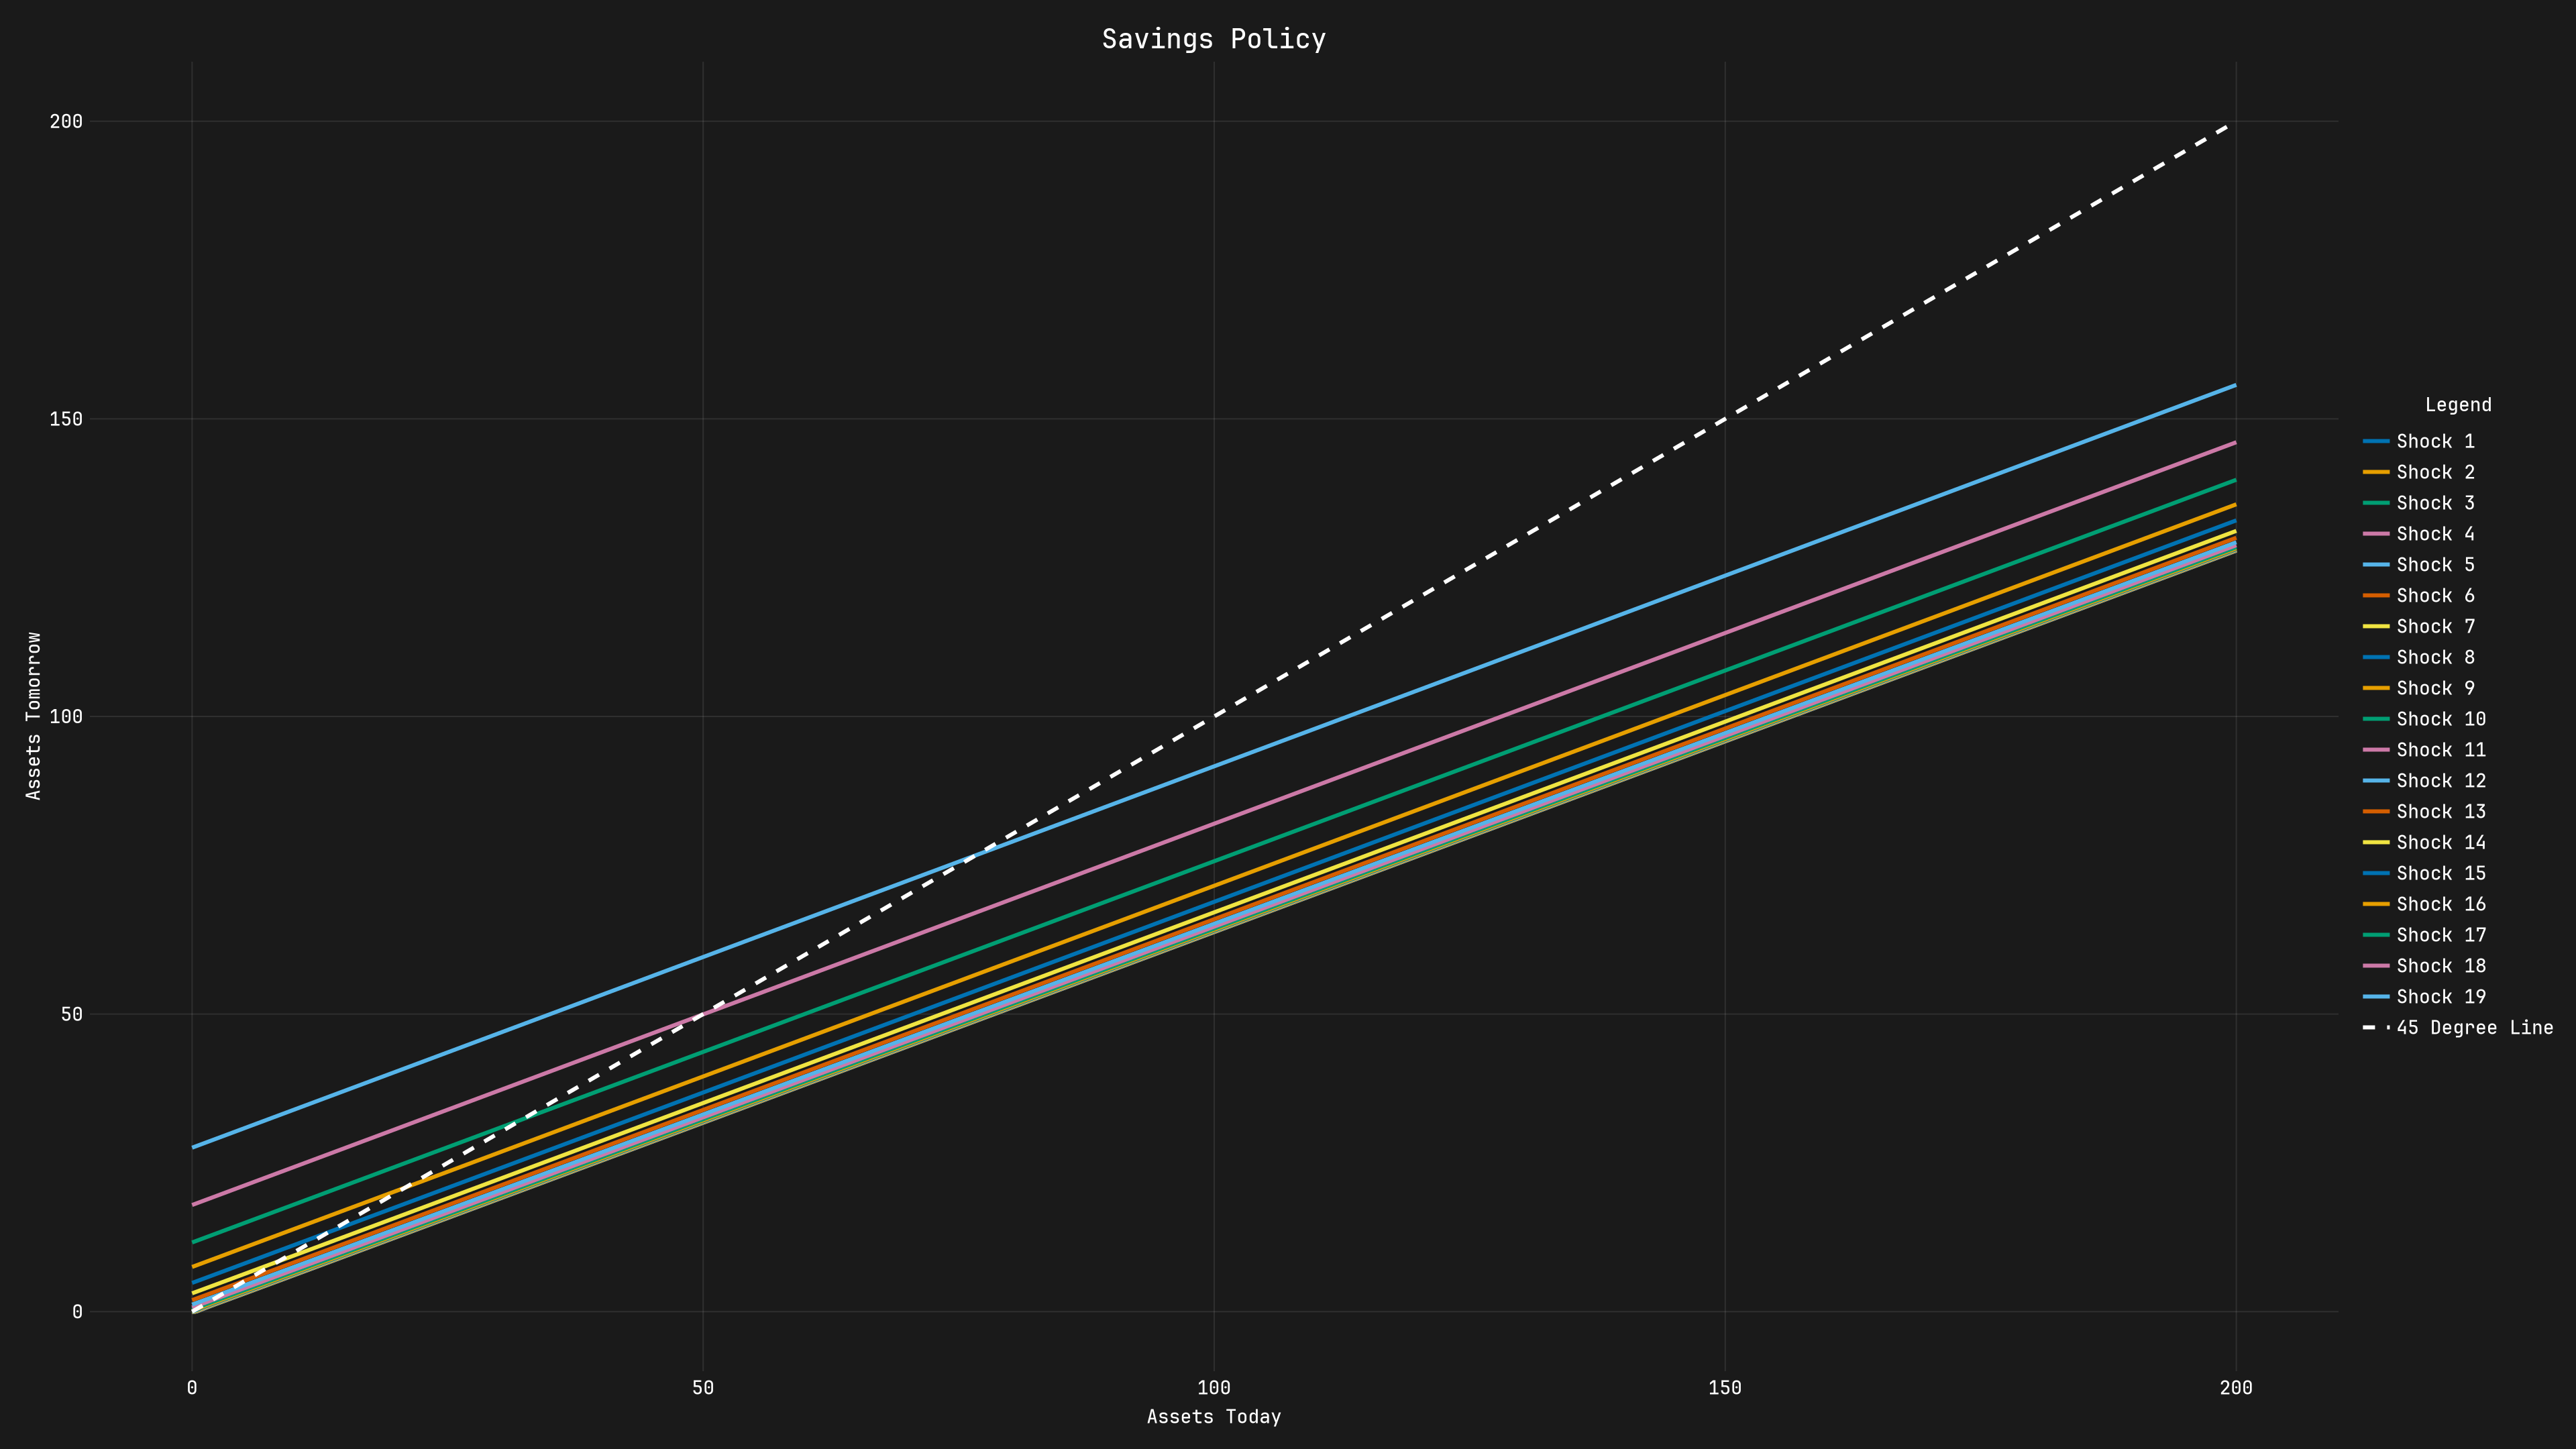

In [181]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Savings Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, test[:, z], linewidth = 3, label = "Shock $z")
end

lines!(ax, model.agrid, model.agrid, color = :white, linestyle = :dash, linewidth = 3, label = "45 Degree Line")

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig